In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

# Display settings
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

print("Ready. If running in colab, upload creditcard.csv and then run the next cell to load it.")

Ready. If running in colab, upload creditcard.csv and then run the next cell to load it.


In [ ]:
df=pd.read_csv('creditcard.csv')

1. Quick EDA (Exploratory Data Analysis)  -- overview and class imbalance

  We'll:


*   Inspect head, info, and summary statistics
*   Check missing values
*   Visualise class imbalance
*   Distribution of Amount and Time





In [ ]:
# Quick checks
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
# Info and missing values
print(df.info())
print("\nMissing values per column:\n",df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

Class counts:
 Class
0.0    11906
1.0       52
Name: count, dtype: int64


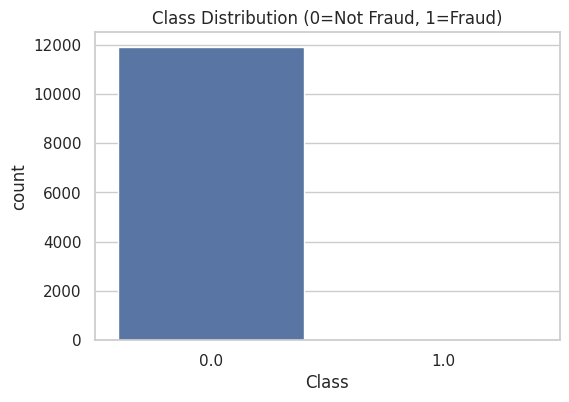


Fraud percentage: 0.434855%


In [ ]:
# class distrbution
counts=df['Class'].value_counts()
print("Class counts:\n",counts)
plt.figure(figsize=(6,4))
sns.countplot(x='Class',data=df)
plt.title('Class Distribution (0=Not Fraud, 1=Fraud)')
plt.show()

# Percentage
print("\nFraud percentage: {:.6f}%".format(100*counts[1]/counts.sum()))

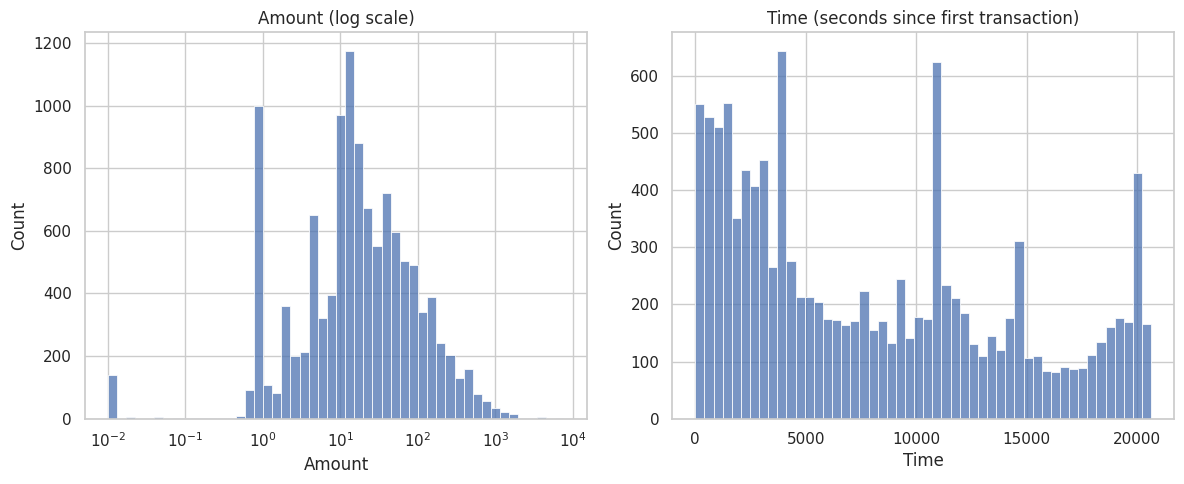

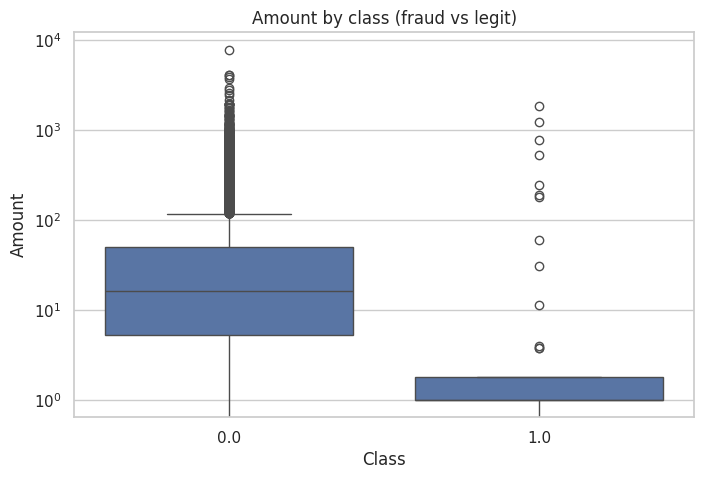

In [ ]:
# Amount and Time Distributions
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Amount'],bins=50,log_scale=True)
plt.title("Amount (log scale)")
plt.subplot(1,2,2)
sns.histplot(df['Time'],bins=50)
plt.title("Time (seconds since first transaction)")
plt.tight_layout()
plt.show()


# Boxplot of amount by class
plt.figure(figsize=(8,5))
sns.boxplot(x='Class', y='Amount',data=df)
plt.title('Amount by class (fraud vs legit)')
plt.yscale('log')
plt.show()


Correlation and PCA (Principal Component Analysis - A smart way to compress your data) features note
The features V1..V28 are PCA-derived components (anonymized - hidden for privacy). We'll compute a correlation matrix and observe relationships with Amount and scaled_time later.

In [ ]:
# Correlation heartmap for a subset (due to many features)
plt.figure(figsize=(12,10))
corr=df.corr()
# show a clipped heatmap for visualisation - focusing on correlations with Class
corr_with_class=corr[['Class']].sort_values(by='Class',ascending=False)
corr_with_class

,Class
Class,1.000000
V11,0.327079
V4,0.273344
V2,0.201002
V27,0.111691
V8,0.052971
V20,0.044611
Time,0.037934
V26,0.028723
V21,0.026382


<Figure size 1200x1000 with 0 Axes>

2. Feature engineering & preprocessing

Steps:

*   Scale Amount and Time (standard scaling)
*   Create X,y and stratified train/test split
*   We'll explore handling imbalance with SMOTE and with class weights





In [ ]:
from sklearn.preprocessing import StandardScaler

df2=df.copy()
scaler_amount=StandardScaler()
# It makes sure that all features (columns) in your dataset are on a similar scale —
# so no single feature dominates just because it has bigger numbers.
scaler_time=StandardScaler()

df2['scaled_amount']=scaler_amount.fit_transform(df2['Amount'].values.reshape(-1,1))
df2['scaled_time']=scaler_time.fit_transform(df2['Time'].values.reshape(-1,1))

# Drop original
df2=df2.drop(['Amount','Time'],axis=1)

# Reorder
cols=['scaled_amount','scaled_time']+[c for c in df2.columns if c not in ['scaled_amount','scaled_time']]
df2=df2[cols]
df2.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.489607,-1.291087,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.334733,-1.291087,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,1.774619,-1.290926,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,0.343063,-1.290926,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,0.042849,-1.290764,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [ ]:
df2=df2.dropna(subset=['Class'])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11958 entries, 0 to 11957
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scaled_amount  11958 non-null  float64
 1   scaled_time    11958 non-null  float64
 2   V1             11958 non-null  float64
 3   V2             11958 non-null  float64
 4   V3             11958 non-null  float64
 5   V4             11958 non-null  float64
 6   V5             11958 non-null  float64
 7   V6             11958 non-null  float64
 8   V7             11958 non-null  float64
 9   V8             11958 non-null  float64
 10  V9             11958 non-null  float64
 11  V10            11958 non-null  float64
 12  V11            11958 non-null  float64
 13  V12            11958 non-null  float64
 14  V13            11958 non-null  float64
 15  V14            11958 non-null  float64
 16  V15            11958 non-null  float64
 17  V16            11958 non-null  float64
 18  V17        

In [ ]:
from sklearn.model_selection import train_test_split

X=df2.drop('Class',axis=1)
y=df2['Class']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print('Train shape:',X_train.shape, 'Test shape:',X_test.shape)
print('Train class distribution:\n',y_train.value_counts())


Train shape: (9566, 30) Test shape: (2392, 30)
Train class distribution:
 Class
0.0    9524
1.0      42
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # FIT on train
X_test_scaled  = scaler.transform(X_test)

Handling Imbalance -- two methods
1. Class Weights: Many sklearn classifiers accept class_weight='balanced' to penalize mistakes on minority class
2. SMOTE(Synthetic Minority Over-Sampling Technique): We will demonstrate SMOTE on training data only (never on test)

In [ ]:
# Install imbalanced-learn if needed (uncomment in Colab)
# !pip install -q imbalanced-learn

from imblearn.over_sampling import SMOTE
# SMOTE creates new synthetic samples of minority class to balance both classes.
print('Before SMOTE:',y_train.value_counts())
sm=SMOTE(random_state=42)
X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)
print('After SMOTE:',y_train_sm.value_counts())

Before SMOTE: Class
0.0    9524
1.0      42
Name: count, dtype: int64
After SMOTE: Class
0.0    9524
1.0    9524
Name: count, dtype: int64


3. Model Building
We'll train three models:

*   Logistic Regression (with class weight and with SMOTE variant)
*   Decision Tree (tuned, with class_weight and with SMOTE variant)
*   Gaussian Naive Bayes (with SMOTE variant)

We'll create helper functions for training,predicting and evaluating.






In [ ]:
 from sklearn.metrics import confusion_matrix, classification_report,precision_recall_curve,roc_curve,auc,precision_score,recall_score,f1_score,roc_auc_score
 def eval_model(model,X_test,y_test,model_name='Model'):
  y_pred=model.predict(X_test)
  y_proba=None
  if hasattr(model,'predict_proba'):
    y_proba=model.predict_proba(X_test)[:,1]
  # hasattr(object,attribute_name)
  # It is built-in function that checks whether an object has a particular attribute
  elif hasattr(model,'decision_function'):
    y_proba=model.decision_function(X_test)
  # decision_function() tells how far and in which direction a sample is
  # from the model’s dividing line between two classes.
  print(f'--- {model_name} ---')
  print(classification_report(y_test,y_pred,digits=4))
  cm=confusion_matrix(y_test,y_pred)
  # [[TN,FP]
    #[FN,TP]] shows confusion matrix
  print('Confusion matrix:\n',cm)
  if y_proba is not None:
    roc_auc=roc_auc_score(y_test,y_proba)
    print(f'ROC AUC: {roc_auc:.4f}')
  return y_pred,y_proba

In [ ]:
# Logistic Regression  - using class weights
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(class_weight='balanced',max_iter=1000,random_state=42)
lr.fit(X_train,y_train)
y_pred_lr,y_proba_lr=eval_model(lr,X_test,y_test,'Logistic Regression (class_weight)')


--- Logistic Regression (class_weight) ---
              precision    recall  f1-score   support

         0.0     0.9996    0.9941    0.9968      2382
         1.0     0.3913    0.9000    0.5455        10

    accuracy                         0.9937      2392
   macro avg     0.6954    0.9471    0.7711      2392
weighted avg     0.9970    0.9937    0.9950      2392

Confusion matrix:
 [[2368   14]
 [   1    9]]
ROC AUC: 0.9086


In [ ]:
# Decision Tree - with class_weight and simple tuning
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(class_weight='balanced',max_depth=6,random_state=42)
dt.fit(X_train,y_train)
y_pred_dt,y_proba_dt=eval_model(dt,X_test,y_test,'Decision Tree (class_weight,max_depth=6)')

--- Decision Tree (class_weight,max_depth=6) ---
              precision    recall  f1-score   support

         0.0     0.9992    0.9987    0.9990      2382
         1.0     0.7273    0.8000    0.7619        10

    accuracy                         0.9979      2392
   macro avg     0.8632    0.8994    0.8804      2392
weighted avg     0.9980    0.9979    0.9980      2392

Confusion matrix:
 [[2379    3]
 [   2    8]]
ROC AUC: 0.8994


In [ ]:
# Gaussian Naive Bayes (no class_weight param) we'll use SMOTE variant later too
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred_nb,y_proba_nb=eval_model(gnb,X_test,y_test,'GaussianNB')

--- GaussianNB ---
              precision    recall  f1-score   support

         0.0     0.9996    0.9773    0.9883      2382
         1.0     0.1429    0.9000    0.2466        10

    accuracy                         0.9770      2392
   macro avg     0.5712    0.9387    0.6175      2392
weighted avg     0.9960    0.9770    0.9852      2392

Confusion matrix:
 [[2328   54]
 [   1    9]]
ROC AUC: 0.9869


4. ROC and Precision-Recall Curves    
For imbalanced data, Precision-Recall curve is often more informative. We'll plot both ROC and PR curves for the models above.

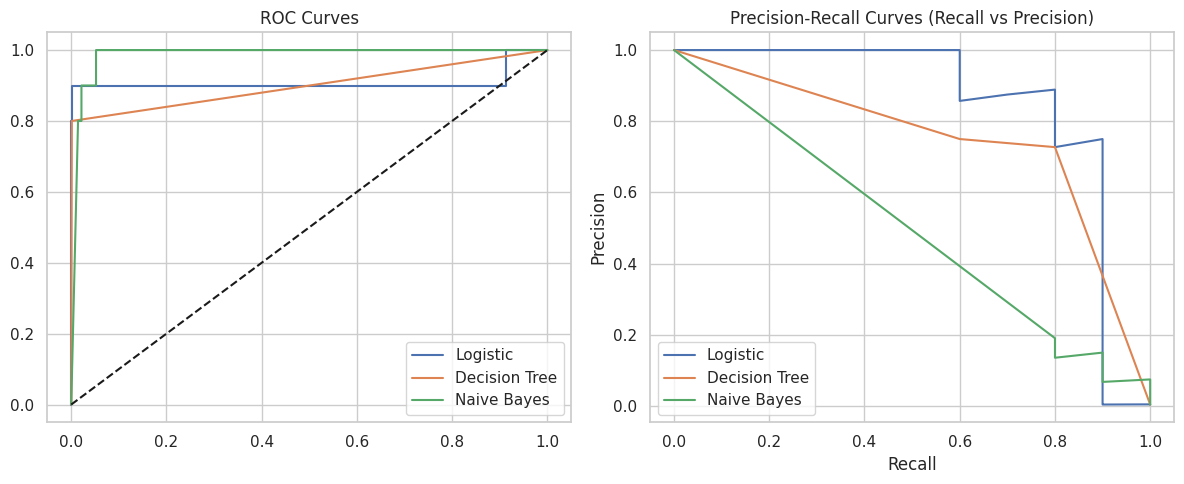

In [ ]:
plt.figure(figsize=(12,5))
# ROC
plt.subplot(1,2,1)
if y_proba_lr is not None:
  fpr,tpr,_=roc_curve(y_test,y_proba_lr)
  plt.plot(fpr,tpr,label='Logistic')
if y_proba_dt is not None:
  fpr,tpr,_=roc_curve(y_test,y_proba_dt)
  plt.plot(fpr,tpr,label='Decision Tree')
if y_proba_nb is not None:
  fpr,tpr,_=roc_curve(y_test,y_proba_nb)
  plt.plot(fpr,tpr,label='Naive Bayes')
plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curves')
plt.legend()

# Precision-Recall
plt.subplot(1,2,2)
if y_proba_lr is not None:
  p,r,_=precision_recall_curve(y_test,y_proba_lr)
  plt.plot(r,p,label='Logistic')
if y_proba_dt is not None:
  p,r,_=precision_recall_curve(y_test,y_proba_dt)
  plt.plot(r,p,label='Decision Tree')
if y_proba_dt is not None:
  p,r,_=precision_recall_curve(y_test,y_proba_nb)
  plt.plot(r,p,label='Naive Bayes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (Recall vs Precision)')
plt.legend()
plt.tight_layout()
plt.show()

5. Train models on SMOTE - resampled training set (alternative approach)
We will retrain models on the SMOTE-resampled training set and evaluate on the original test set(this avoids test lekage).


In [ ]:
# Logistic Regression trained on SMOTE
lr_sm=LogisticRegression(max_iter=1000,random_state=42)
lr_sm.fit(X_train_sm,y_train_sm)
y_pred_lr_sm,y_proba_lr_sm=eval_model(lr_sm,X_test,y_test,'Logistic Regression (trained on SMOTE)')

# Decision Tree trained on SMOTE
dt_sm=DecisionTreeClassifier(max_depth=6,random_state=42)
dt_sm.fit(X_train_sm,y_train_sm)
y_pred_dt_sm,y_proba_dt_sm=eval_model(dt_sm,X_test,y_test,'Decision Tree (trained on SMOTE)')

# Naive Bayes trained on SMOTE
gnb_sm=GaussianNB()
gnb_sm.fit(X_train_sm,y_train_sm)
y_pred_nb_sm,y_proba_nb_sm=eval_model(gnb_sm,X_test,y_test,'GaussianNB (trained on SMOTE)')





--- Logistic Regression (trained on SMOTE) ---
              precision    recall  f1-score   support

         0.0     0.9996    0.9950    0.9973      2382
         1.0     0.4286    0.9000    0.5806        10

    accuracy                         0.9946      2392
   macro avg     0.7141    0.9475    0.7890      2392
weighted avg     0.9972    0.9946    0.9955      2392

Confusion matrix:
 [[2370   12]
 [   1    9]]
ROC AUC: 0.9078
--- Decision Tree (trained on SMOTE) ---
              precision    recall  f1-score   support

         0.0     0.9992    0.9983    0.9987      2382
         1.0     0.6667    0.8000    0.7273        10

    accuracy                         0.9975      2392
   macro avg     0.8329    0.8992    0.8630      2392
weighted avg     0.9978    0.9975    0.9976      2392

Confusion matrix:
 [[2378    4]
 [   2    8]]
ROC AUC: 0.8989
--- GaussianNB (trained on SMOTE) ---
              precision    recall  f1-score   support

         0.0     0.9996    0.9777    0.98

6. Feature importance (Decision Tree) & Interpretability

We'll show the top features according to the Decision Tree model trained earlier.

In [ ]:
# Feature importance from decision tree (non-SMOTE version)
importances=dt.feature_importances_
feat_names=X_train.columns
fi=pd.Series(importances,index=feat_names).sort_values(ascending=False)
fi.head(15)

,0
V11,0.857431
V4,0.059909
V19,0.046504
V1,0.033865
V28,0.001449
V8,0.000420
V12,0.000210
V20,0.000210
V17,0.000003
V5,0.000000


**7. Cross-validation & GridSearch (example)**

We will run a small GridSearch for Decision Tree to show professional hyperparameter tuning. for time reasons it's kept small; you can expand it.

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid={'max_depth':[4,6,8], 'min_samples_split':[2,5,10]}
cv=StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
grid=GridSearchCV(DecisionTreeClassifier(class_weight='balanced',random_state=42),param_grid,scoring='f1',cv=cv,n_jobs=-1)
grid.fit(X_train,y_train)
print('Best params:',grid.best_params_)
best_dt=grid.best_estimator_
y_pred_grid,y_proba_grid=eval_model(best_dt,X_test,y_test,'Decision Tree (GridSearch)')

Best params: {'max_depth': 4, 'min_samples_split': 2}
--- Decision Tree (GridSearch) ---
              precision    recall  f1-score   support

         0.0     0.9992    0.9987    0.9990      2382
         1.0     0.7273    0.8000    0.7619        10

    accuracy                         0.9979      2392
   macro avg     0.8632    0.8994    0.8804      2392
weighted avg     0.9980    0.9979    0.9980      2392

Confusion matrix:
 [[2379    3]
 [   2    8]]
ROC AUC: 0.8993


**8. Save the final model & next steps**

You can pick the best model (by business metric) and save it. Also suggestions for productionization and next steps.

In [ ]:
import joblib

joblib.dump(scaler, 'fraud_scaler.pkl')
print("Saved scaler to fraud_scaler.pkl")

joblib.dump(lr,'logistic_regression_fraud_model.pkl')
print("Saved model to logistic_regression_fraud_model.pkl")

joblib.dump(dt,'decision_tree_fraud_model.pkl')
print("Saved model to decision_tree_fraud_model.pkl")

joblib.dump(gnb,'naive_bayes_fraud_model.pkl')
print("Saved model to naive_bayes_fraud_model.pkl")


# Summary table (example)
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
results=pd.DataFrame([
    ['Logistic (cw)', accuracy_score(y_test,y_pred_lr),precision_score(y_test,y_pred_lr,zero_division=0),recall_score(y_test,y_pred_lr),f1_score(y_test,y_pred_lr)],
    ['DecisionTree (cw)', accuracy_score(y_test,y_pred_dt),precision_score(y_test,y_pred_dt,zero_division=0), recall_score(y_test,y_pred_dt),f1_score(y_test,y_pred_dt)],
    ['GaussianNB',accuracy_score(y_test,y_pred_nb),precision_score(y_test,y_pred_nb,zero_division=0),recall_score(y_test,y_pred_nb),f1_score(y_test,y_pred_nb)]
],columns=['Model','Accuracy','Precision','Recall','F1'])
results

Saved scaler to fraud_scaler.pkl
Saved model to logistic_regression_fraud_model.pkl
Saved model to decision_tree_fraud_model.pkl
Saved model to naive_bayes_fraud_model.pkl


,Model,Accuracy,Precision,Recall,F1
0,Logistic (cw),0.993729,0.391304,0.9,0.545455
1,DecisionTree (cw),0.997910,0.727273,0.8,0.761905
2,GaussianNB,0.977007,0.142857,0.9,0.246575


In [ ]:
import numpy as np,joblib

model=joblib.load('logistic_regression_fraud_model.pkl')
scaler=joblib.load('fraud_scaler.pkl')
new_sample = np.array([[0.23, -1.54, 0.87, 2.13, -0.67, 1.24, -0.98, 0.32,
                        -1.12, 0.54, 0.88, -0.34, 1.12, 0.76, -0.65, 0.49,
                        1.02, -0.91, 0.45, 0.33, -1.11, 0.77, 1.24, -0.56,
                        0.91, -1.25, 0.67, 0.88, -0.76, 0.34]])  # shape (1, 30)

new_sample_scaled=scaler.transform(new_sample)



y_pred = model.predict(new_sample_scaled)
y_proba = model.predict_proba(new_sample_scaled)[:, 1]

print("Predicted Class:", y_pred[0])        # 0 = Not Fraud, 1 = Fraud
print("Fraud Probability:", y_proba[0])

Predicted Class: 0.0
Fraud Probability: 3.751085024282217e-09
